## Comparison of Quantum ML and Classical ML

Simulation of Detection of Purchasing Behaviors of People Using Supervised Quantum Machine Learning Based on Continous-Variable Model


In [1]:
%pip install -r requirements.txt

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.1.14_1/libexec/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import yaml
from yaml.loader import SafeLoader

with open('consts.yaml') as f:
    data = yaml.load(f, Loader=SafeLoader)
    for key in data:
        globals()[key] = data[key]

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import *


# Address of WebAPI or file with the JSON extension
url = URL

print("Connecting to a Cloud Service: ", url)

try:
    # load data that type of JSON to dataframe
    df = pd.read_json(url, orient='columns')

    if(df is None):
        print("Data Not Available!")
    else:
        # Yas = Age, AlisverisSayisi = ShoppingCount, SatinAldiMi = PurchaseStatus
        df[YAS] = df[YAS].astype(float)
        df['AlisverisSayisi'] = df['AlisverisSayisi'].astype(float)
        df['SatinAldiMi'] = df['SatinAldiMi'].astype(float)

        print("Connected to Cloud Service!")
        print("The data consists of " ,len(df), "samples.\n")

        # show the last 10 data
        print(df.tail(10))
        # show the first 10 data
        # df.head(10)
except:
    print("Not Connected to the Cloud Service!")   

Connecting to a Cloud Service:  https://qml.azurewebsites.net/api/Alisveris
Not Connected to the Cloud Service!


In [10]:
# Graphical representation of the purchase status of the product

import matplotlib.lines as mlines

diziBoyut=len(df['SatinAldiMi'])
plt.figure(figsize=(6,6))
for i in range(diziBoyut):
    if((df['SatinAldiMi'][i])==1.0):
        plt.scatter(df[YAS][i],df['AlisverisSayisi'][i], color=YELLOW)
    else:
        plt.scatter(df[YAS][i],df['AlisverisSayisi'][i], color=BLACK)

plt.ylabel(SHOPING_YLABEL)
plt.xlabel(SHOPING_XLABEL)

alanlar_line = mlines.Line2D([], [], color=YELLOW, marker='.', markersize=14, label='Was Bought')
almayanlar_line = mlines.Line2D([], [], color=BLACK, marker='.', markersize=14, label='Wasn\'t Bought')
plt.legend(handles=[alanlar_line,almayanlar_line],loc='upper right')

plt.show()

NameError: name 'df' is not defined

Amount of training data :	 158
Amount of testing data :	 53


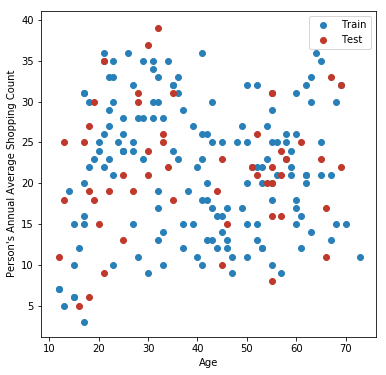

In [3]:
# We only get data which we need.

# Age (Yas) and  Average Shopping Count (AlisverisSayisi) informations
x = df.iloc[:, [4,0]].values

# Purchase status
y = df.iloc[:, 3].values

# split data as test (25%) and training (75%)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# X_test_pure to be used when new data is tested
X_test_pure=X_test
print("Amount of training data :\t {}".format(len(X_train)))
print("Amount of testing data :\t {}".format(len(X_test)))

# Distribution of test and training data on graphics
plt.figure(figsize=(6,6))
plt.ylabel(SHOPING_YLABEL)
plt.xlabel(SHOPING_XLABEL)

plt.scatter(X_train[:,0],X_train[:,1], color=BLUE, label=LABEL_TRAIN)
plt.scatter(X_test[:,0],X_test[:,1], color=RED, label=LABEL_TEST)
plt.legend(loc='upper right')
plt.show()

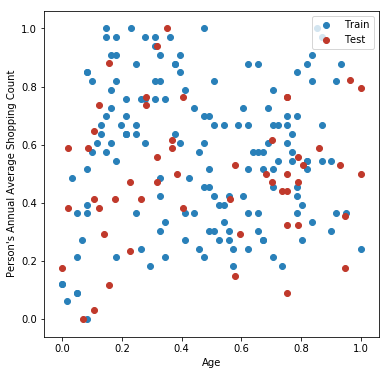

In [4]:
# Normalization
# Since the independent variables are not in the same unit, the normalization process is applied.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

MinMaxScaler(copy=True, feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))
X_test = scaler.fit_transform(X_test)

# Graph of training and test data after normalization
plt.figure(figsize=(6,6))
plt.ylabel(SHOPING_YLABEL)
plt.xlabel(SHOPING_XLABEL)

plt.scatter(X_train[:,0],X_train[:,1], color=BLUE, label=LABEL_TRAIN)
plt.scatter(X_test[:,0],X_test[:,1], color=RED, label=LABEL_TEST)
plt.legend(loc='upper right')
plt.show()

## Quantum Machine Learning

### Supervised Learning

In this sample of Supervised Learning; between the two classes, the **variational circuit** for 2D pattern recognition task is trained.

Firstly, the **Strawberry Fields** library, a few gates, learner and helper imported in the code.

##### **Source: ** https://qmlt.readthedocs.io/en/latest/tutorials/numerical.html#supervised-learning


In [5]:
import strawberryfields as sf
from strawberryfields.ops import Dgate, BSgate
import numpy as np
from qmlt.numerical import CircuitLearner
from qmlt.numerical.helpers import make_param
from qmlt.numerical.losses import square_loss

In [6]:
steps = 101
batch_size = 2

my_init_params = [make_param(name='phi', constant=2.,monitor=True)]

In [10]:
# Setting the model hyperparams and training algorithm.
hyperparams = {'circuit': circuit,
               'init_circuit_params': my_init_params,
               'task': 'supervised',
               'loss': myloss,
               'optimizer': 'SGD',
               'init_learning_rate': 0.5,
               'decay': 0.01,
               'log_every': 5,
               'warm_start': False # Not using previous results in the next training.
               }

In [11]:
# Creation of learner.
learner = CircuitLearner(hyperparams=hyperparams)

# Training of the learner.
learner.train_circuit(X=X_train, Y=Y_train, steps=steps, batch_size=batch_size)



----------------------------- 
 HYPERPARAMETERS: 

adaptive_learning_rate_threshold - 0.0 (default value)
circuit - User defined function.
decay - 0.01
epsilon - 1e-06 (default value)
init_circuit_params - Values: [2.0].
init_learning_rate - 0.5
log_every - 5
loss - User defined function.
optimizer - SGD
plot - False (default value)
print_log - True (default value)
regularization_strength - 0.1 (default value)
regularizer - No regularizer provided.
task - supervised
warm_start - False

 -----------------------------
Initial loss = 34.7467510743608 | Initial regularizer = 0.0 |  

Global step 1 | Loss = 34.85269770540879 | Regularizer = 0.0 |  learning rate = 0.5 |  
Global step 6 | Loss = 21.349592903041696 | Regularizer = 0.0 |  learning rate = 0.47619047619047616 |  
Global step 11 | Loss = 19.84071968674987 | Regularizer = 0.0 |  learning rate = 0.45454545454545453 |  
Global step 16 | Loss = 11.597700770215319 | Regularizer = 0.0 |  learning rate = 0.4347826086956522 |  
Global st

In [12]:
# In Quantum, the results are always probabilistic, so (if necessary) process (learning) can be repeated.
# Re-setting the model hyperparams and training algorithm.
hyperparams = {'circuit': circuit,
               'init_circuit_params': my_init_params,
               'task': 'supervised',
               'loss': myloss,
               'optimizer': 'SGD',
               'init_learning_rate': 0.5,
               'decay': 0.01,
               'log_every': 500,
               'warm_start': True # Using previous results in the next training.              
               }

In [13]:
# Re-Creation of learner with new paremeters.
learner = CircuitLearner(hyperparams=hyperparams)

# Evaluation of the score of the test data set.
test_score = learner.score_circuit(X=X_test, Y=Y_test, outputs_to_predictions=outputs_to_predictions)
kuantum_dogruluk_orani=100*test_score['accuracy']

# If the desired result is not achieved, continue with the training.
while(kuantum_dogruluk_orani<92):
    # Training of the learner.
    learner.train_circuit(X=X_train, Y=Y_train, steps=steps, batch_size=batch_size)
    # Evaluation of the score of the test data set.
    test_score = learner.score_circuit(X=X_test, Y=Y_test, outputs_to_predictions=outputs_to_predictions)
    kuantum_dogruluk_orani=100*test_score['accuracy']
    
print("Quantum ML Accuracy Rate:\t % {}".format(kuantum_dogruluk_orani))


----------------------------- 
 HYPERPARAMETERS: 

adaptive_learning_rate_threshold - 0.0 (default value)
circuit - User defined function.
decay - 0.01
epsilon - 1e-06 (default value)
init_circuit_params - Values: [0.23109943157232526].
init_learning_rate - 0.5
log_every - 500
loss - User defined function.
optimizer - SGD
plot - False (default value)
print_log - True (default value)
regularization_strength - 0.1 (default value)
regularizer - No regularizer provided.
task - supervised
warm_start - True

 -----------------------------
Quantum ML Accuracy Rate:	 % 92.45283018867924


# Classical Machine Learning
## Supervised Learning
Classification with Support Vector Machine (SVM) algorithm

In [14]:
# Creating and training SVM model

from sklearn.svm import SVC
classifier_c = SVC(kernel='linear', random_state = 0)
classifier_c.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
# Definition of the Confusion Matrix

# confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
# Confusion Matrix: Used to calculate the accuracy of a classification process.
# For binary classification;
# Count of true negatives  C[0,0] -> count of of matches 0-0 
# Count of false negatives C[1,0] -> count of of matches 1-0 
# Count of true positives  C[1,1] -> count of of matches 1-1 
# Count of false positives C[0,1] -> count of of matches 0-1 

# Creation of Confusion Matrix for Classial Machine Learning

from sklearn.metrics import confusion_matrix

klasik_TP = klasik_TN = klasik_FP = klasik_FN = 0

Y_pred_class = classifier_c.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_class)
# print(cm)

klasik_TP = cm[1][1]
klasik_TN = cm[0][0]
klasik_FP = cm[0][1]
klasik_FN = cm[1][0]

true_p = cm[0][0]+cm[1][1]
false_p = cm[0][1]+cm[1][0]
klasik_dogruluk_orani=(true_p*100)/len(Y_test)

#############################################################

# Creation of Confusion Matrix for Quantum Machine Learning

TahminiDeger = GercekDeger = 0.0
TestVeriSayisi = Bildi = Bilemedi = 0
kuantum_TP = kuantum_TN = kuantum_FP = kuantum_FN = 0


kuantum_y_tahmin=[]

for i in range(len(X_test)):
    GercekDeger=Y_test[i]
    outcomes = learner.run_circuit(X=X_test[[i]], outputs_to_predictions=outputs_to_predictions)
    TahminiDeger=outcomes['predictions'][0]
    kuantum_y_tahmin.append(outcomes['predictions'][0])
    if GercekDeger==TahminiDeger:
        Bildi+=1
        if(GercekDeger==1.0):
            kuantum_TP+=1;
        else:
            kuantum_TN+=1;
    else:
        Bilemedi+=1
        if(GercekDeger==1.0):
            kuantum_FP+=1;
        else:
            kuantum_FN+=1;

TestVeriSayisi = len(X_test)
            
print(ENTER)
print("Total count of test dataset : ", TestVeriSayisi)
print(ENTER)

print("Values of Classical ML Confusion Matrix\n_____________________________________\n")
print("True Prediction Count (TP+TN)  : ",true_p)
print("False Prediction Count (FP+FN) : ",false_p)
print(TP, klasik_TP)
print(TN, klasik_TN)
print(FP, klasik_FP)
print(FN, klasik_FN)

print(ENTER)
print(ENTER)

print("Values of Quantum ML Confusion Matrix\n_____________________________________\n")
print("True Prediction Count (TP+TN)  : ",Bildi)
print("False Prediction Count (FP+FN) : ",Bilemedi)
print(TP, kuantum_TP)
print(TN, kuantum_TN)
print(FP, kuantum_FP)
print(FN, kuantum_FN)

print(ENTER)
print(ENTER)

print("Classical ML Accuracy Rate:\t %{}".format(round(klasik_dogruluk_orani,1)))
print("Quantum ML Accuracy Rate:\t %{}".format(round(kuantum_dogruluk_orani,1)))



Total count of test dataset :  53


Values of Classical ML Confusion Matrix
_____________________________________

True Prediction Count (TP+TN)  :  46
False Prediction Count (FP+FN) :  7
TP :  17
TN :  29
FP :  1
FN :  6



Values of Quantum ML Confusion Matrix
_____________________________________

True Prediction Count (TP+TN)  :  49
False Prediction Count (FP+FN) :  4
TP : 21
TN : 28
FP : 2
FN : 2



Classical ML Accuracy Rate:	 %86.8
Quantum ML Accuracy Rate:	 %92.5


In [16]:
# Accuracy rate of the Classifier
print("Accuracy\n___________________\n")
print(CLASSICAL,round((klasik_TP+klasik_TN)/TestVeriSayisi, 2))
print("Quantum   : ",round((kuantum_TP+kuantum_TN)/TestVeriSayisi, 2))

print(ENTER)
# Error Rate of the Classifier
print("Error Rate\n___________________\n")
print(CLASSICAL,round((klasik_FP+klasik_FN)/TestVeriSayisi, 2))
print(QUANTUM,round((kuantum_FP+kuantum_FN)/TestVeriSayisi, 2))

print(ENTER)
# When the "Positive" is real, which is often estimated "Positive"
print("Recall - Sensivity - True Positive Rate\n___________________\n")
print(CLASSICAL,round((klasik_TP)/(klasik_TP+klasik_FN), 2))
print(QUANTUM,round((kuantum_TP)/(kuantum_TP+kuantum_FN), 2))

print(ENTER)
# When the "Negative" is real, which is often estimated "Negative"
print("Specificity - True Negative Rate\n___________________\n")
print(CLASSICAL,round((klasik_TN)/(klasik_FP+klasik_TN), 2))
print(QUANTUM,round((kuantum_TN)/(kuantum_FP+kuantum_TN), 2))

print(ENTER)
# When the "Negative" is real, which is often estimated "Positive"
print("False Positive Rate (1 - Specificity)\n___________________\n")
print(CLASSICAL,round((klasik_FP)/(klasik_FP+klasik_TN), 2))
print(QUANTUM,round((kuantum_FP)/(kuantum_FP+kuantum_TN), 2))

print(ENTER)
# "Positive" forecast accuracy rate
print("Precision\n___________________\n")
print(CLASSICAL,round((klasik_TP)/(klasik_TP+klasik_FP), 2))
print(QUANTUM,round((kuantum_TP)/(kuantum_TP+kuantum_FP), 2))

print(ENTER)

Accuracy
___________________

Classical :  0.87
Quantum   :  0.92


Error Rate
___________________

Classical :  0.13
Quantum   :  0.08


Recall - Sensivity - True Positive Rate
___________________

Classical :  0.74
Quantum   :  0.91


Specificity - True Negative Rate
___________________

Classical :  0.97
Quantum   :  0.93


False Positive Rate (1 - Specificity)
___________________

Classical :  0.03
Quantum   :  0.07


Precision
___________________

Classical :  0.94
Quantum   :  0.91




Classical AUC : 0.853
Quantum AUC   : 0.923


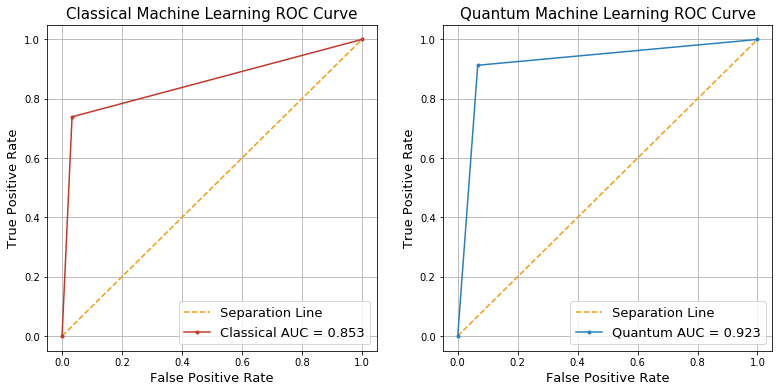

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


klasik_y_tahmin = Y_pred_class #Classial ML predictions


klasik_auc = roc_auc_score(Y_test, klasik_y_tahmin)
print('Classical AUC : %.3f' % klasik_auc)
fpr, tpr, thresholds = roc_curve(Y_test, klasik_y_tahmin)

kuantum_auc = roc_auc_score(Y_test, kuantum_y_tahmin)
print('Quantum AUC   : %.3f' % kuantum_auc)
qfpr, qtpr, qthresholds = roc_curve(Y_test, kuantum_y_tahmin)


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))

ax1.plot([0, 1], [0, 1], linestyle='--', color='#f39c12')
ax1.plot(fpr, tpr, marker='.',color='#c0392b')
ax1.set_title("Classical Machine Learning ROC Curve", fontsize=15)
ax1.set_ylabel('True Positive Rate', fontsize=13)
ax1.set_xlabel('False Positive Rate', fontsize=13)
ax1.grid()
ax1.legend(["Separation Line","Classical AUC = %.3f"%klasik_auc], fontsize=13, loc=4)

ax2.plot([0, 1], [0, 1], linestyle='--', color='#f39c12')
ax2.plot(qfpr, qtpr, marker='.',color='#2980b9')
ax2.set_title("Quantum Machine Learning ROC Curve", fontsize=15)
ax2.set_ylabel('True Positive Rate', fontsize=13)
ax2.set_xlabel('False Positive Rate', fontsize=13)
ax2.grid()
ax2.legend(["Separation Line", "Quantum AUC = %.3f"%kuantum_auc], fontsize=13, loc=4)

plt.show()


Age : 35
Annual Average Shopping Count : 30
The normalization process is applied to new inputs :  [[0.40350877 0.73529412]]

According to Classical ML which have 86.8 accurancy rate, customer; May buy product.

According to Quantum ML which have 92.5 accurancy rate, customer  ; May buy product.


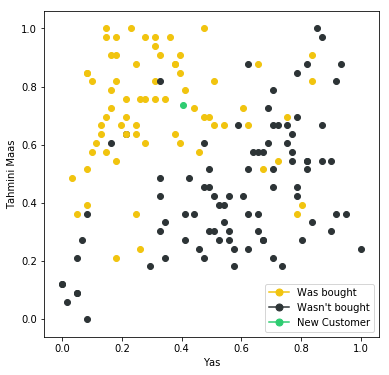

In [18]:
# Predict to whether or not this user is buying by user information entered from external.

yas =float(input("Age : ")) 
maas = float (input("Annual Average Shopping Count : "))

newrow = [[yas, maas]]

# Adding the latest data to the test dataset for normalization
X_test_pure = np.concatenate((X_test_pure,newrow))


# Normalization of test dataset
X_test_sc = scaler.fit_transform(X_test_pure)

# The normalization process is applied to new inputs:
print("The normalization process is applied to new inputs : ",X_test_sc[[-1]])

# Send to Quantum ML the latest added data X_test_sc[-1]
outcomes = learner.run_circuit(X=X_test_sc[[-1]], outputs_to_predictions=outputs_to_predictions)


print("\nAccording to Classical ML which have {} accurancy rate, customer;{}".format(round(klasik_dogruluk_orani,1),sonucugor(classifier_c.predict(X_test_sc[[-1]]))))
print("\nAccording to Quantum ML which have {} accurancy rate, customer  ;{}".format(round(kuantum_dogruluk_orani,1),sonucugor(outcomes['predictions'][0])))      

new_data=X_test_sc[-1]

plt.figure(figsize=(6,6))

for i in range(len(X_train)):
    if((Y_train[i])==1.0):
        plt.scatter(X_train[i][0],X_train[i][1], color='#f1c40f')
    else:
        plt.scatter(X_train[i][0],X_train[i][1],  color='#2d3436')

plt.scatter(new_data[0],new_data[1], color='#2ecc71')

plt.ylabel('Tahmini Maas')
plt.xlabel(YAS)

alanlar_line = mlines.Line2D([], [], color=YELLOW, marker='.', markersize=14, label='Was bought')
almayanlar_line = mlines.Line2D([], [], color=BLACK, marker='.', markersize=14, label='Wasn\'t bought')
new = mlines.Line2D([], [], color=GREEN, marker='.', markersize=14, label='New Customer')

plt.legend(handles=[alanlar_line,almayanlar_line,new],loc='lower right')

plt.show()